In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [43]:
df= pd.read_csv('cleaned_cars.csv')

In [44]:
#finding the average selling price 
Mean_selling_price = df['selling_price'].mean()
Mean_selling_price

np.float64(501378.18114682887)

In [45]:
#most common fuel type 
Most_common_fuel = df["fuel"].value_counts().idxmax()
Most_common_fuel

'Diesel'

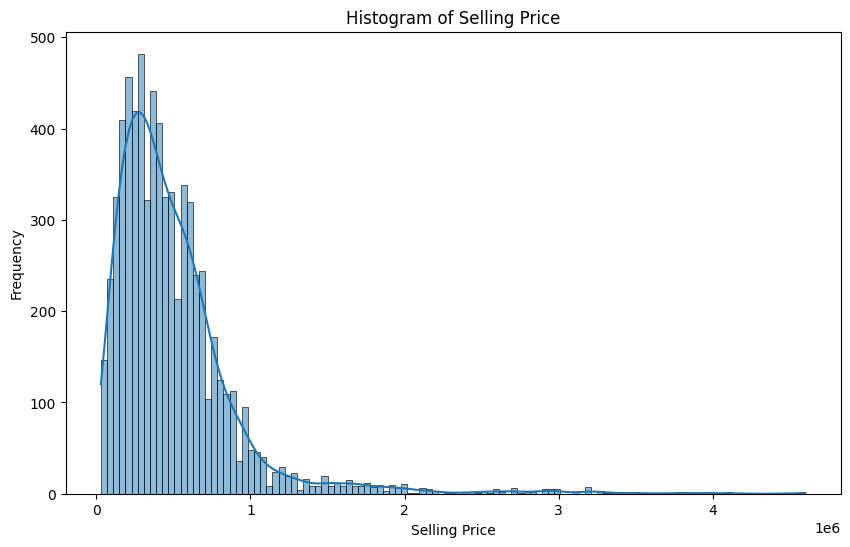

In [46]:
#plotting a histogram for the selling price
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], kde=True)
plt.title('Histogram of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


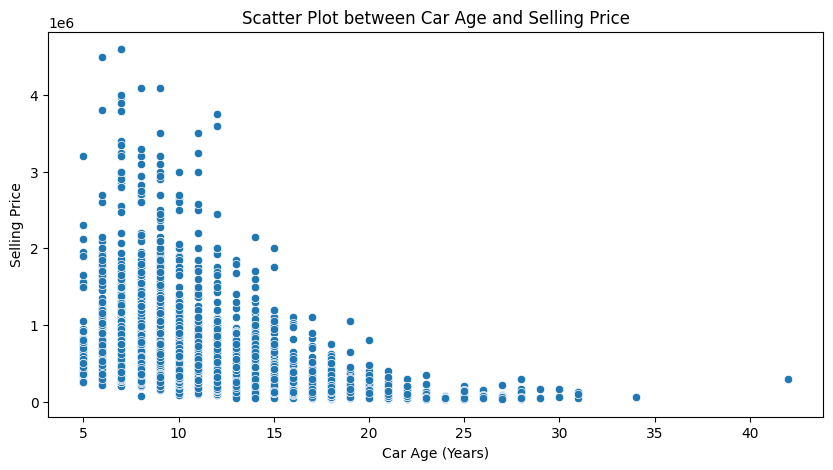

In [47]:
#scatter plot between car age and selling price 
plt.figure(figsize=(10,5))
sns.scatterplot(x='car_age', y='selling_price', data=df)
plt.title('Scatter Plot between Car Age and Selling Price')
plt.xlabel('Car Age (Years)')
plt.ylabel('Selling Price')
plt.show()

In [48]:
# Grouping cars by fuel type and finding  the average selling price for each group.
df.groupby('fuel')['selling_price'].mean()

fuel
CNG       300499.946429
Diesel    620448.482224
LPG       200421.052632
Petrol    363717.339629
Name: selling_price, dtype: float64

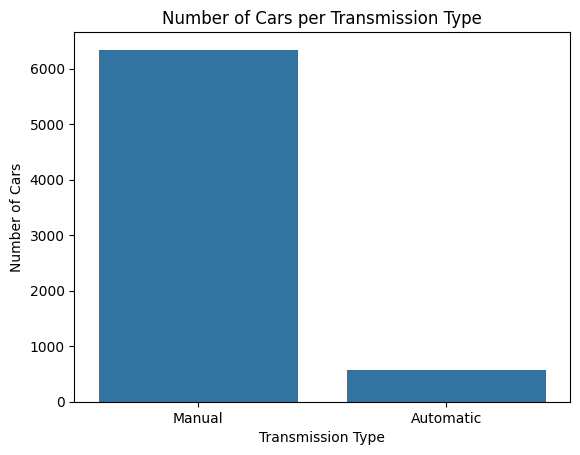

In [49]:
#bar chart showing the number of cars per transmission type.
sns.countplot(x='transmission', data=df)
plt.title('Number of Cars per Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Number of Cars')
plt.show()


In [50]:
#car with the highest mileage
Highest_mileage = df.loc[df['mileage(km/ltr/kg)'].idxmax()]
Car_name=Highest_mileage['name']
print(f"The car with the highest mileage is {Car_name} ({Highest_mileage['mileage(km/ltr/kg)']} km/ltr/kg).")

The car with the highest mileage is Maruti Swift Dzire VDI (19.41878335651954 km/ltr/kg).


In [51]:
#correlation between mileage and selling price
correlation = df['mileage(km/ltr/kg)'].corr(df['selling_price'])
correlation


np.float64(9.780436103405798e-17)

In [52]:
print(df[['mileage(km/ltr/kg)', 'selling_price']].corr())

                    mileage(km/ltr/kg)  selling_price
mileage(km/ltr/kg)                 NaN            NaN
selling_price                      NaN            1.0


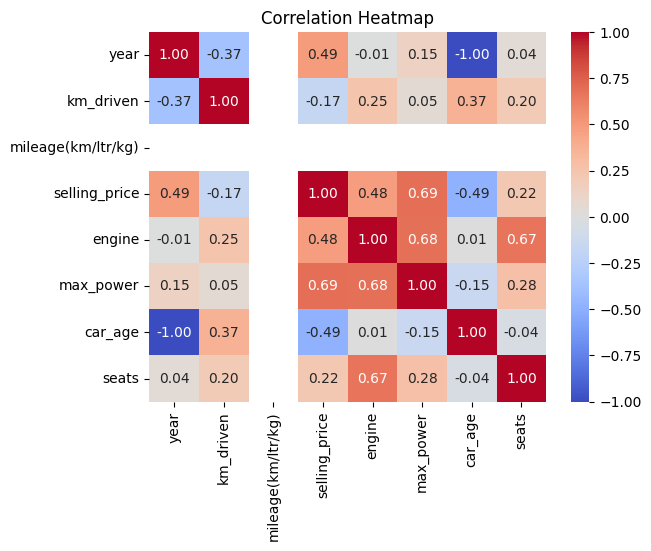

In [53]:
#Plot a heatmap showing the correlations between all numeric columns.
numeric_cols = ['year','km_driven','mileage(km/ltr/kg)', 'selling_price', 'engine', 'max_power', 'car_age','seats'] 
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [54]:
# Group by transmission type and calculate average selling price
avg_price_by_transmission = df.groupby('transmission')['selling_price'].mean()
print(avg_price_by_transmission)

transmission
Automatic    1.143215e+06
Manual       4.442991e+05
Name: selling_price, dtype: float64


In [55]:
# Group by year and calculate average selling price
avg_price_by_year = df.groupby('year')['selling_price'].mean().sort_index()
print(avg_price_by_year)


year
1983    300000.000000
1991     55000.000000
1994     88000.000000
1995    107500.000000
1996     81666.666667
1997     90181.727273
1998     73100.000000
1999     71470.588235
2000     90047.850000
2001     47220.333333
2002     99153.807692
2003     97034.021277
2004    109364.250000
2005    137994.494505
2006    164383.308943
2007    174894.505682
2008    208397.639024
2009    227691.620833
2010    273897.334211
2011    318335.696751
2012    351387.379139
2013    451501.724199
2014    511858.798623
2015    589177.625551
2016    653180.339105
2017    708006.173913
2018    825749.553897
2019    795583.291667
2020    786548.338710
Name: selling_price, dtype: float64


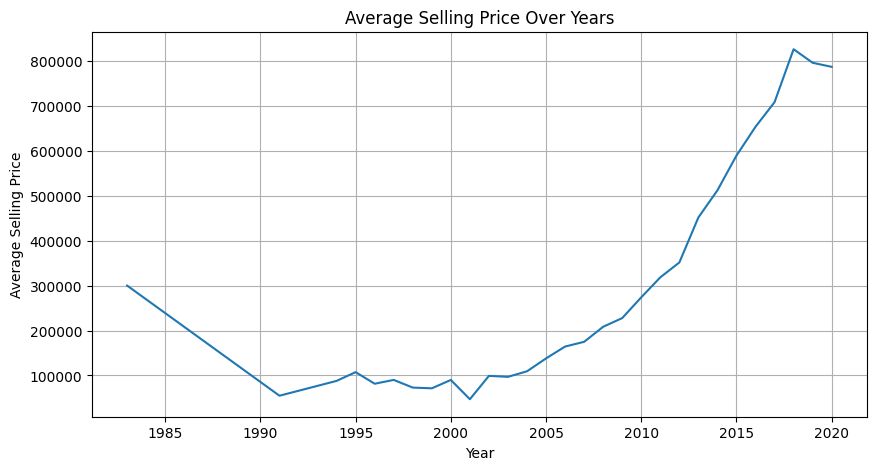

In [56]:
#Plot a line chart showing the trend of selling prices over the years.
plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_price_by_year.index, y=avg_price_by_year.values)
plt.title('Average Selling Price Over Years')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.grid()
plt.show()


In [57]:
#Find the most expensive car for each fuel type.
most_expensive_cars = df.loc[df.groupby('fuel')['selling_price'].idxmax()]
most_expensive_cars[['fuel', 'name', 'selling_price']]

,fuel,name,selling_price
4961,CNG,Maruti Ertiga VXI CNG Limited Edition,545000
283,Diesel,Mercedes-Benz GL-Class 220d 4MATIC Sport,4600000
2783,LPG,Hyundai i10 Sportz 1.1L LPG,375000
133,Petrol,Jeep Wrangler 2016-2019 3.6 4X4,4100000


In [58]:
#Finding out which brand appears most frequently in the dataset.
most_frequent_brand = df["name"].mode()[0]
most_frequent_brand_count = df["name"].value_counts().max()
most_frequent_brand, most_frequent_brand_count

('Maruti Swift Dzire VDI', np.int64(118))

In [59]:
#Checking the top 5 most common combinations of fuel type and transmission.
common_fuel_transmission = df.groupby(['fuel', 'transmission']).size().reset_index(name='count') # name = 'count' gives the name of the new column
top_5_common = common_fuel_transmission.nlargest(5, 'count') #nlargest gives the top n rows 
print(top_5_common)

     fuel transmission  count
2  Diesel       Manual   3457
5  Petrol       Manual   2791
1  Diesel    Automatic    284
4  Petrol    Automatic    280
0     CNG       Manual     56


#### MACHINE LEARNING


#### Assumptions of linear regression
1. Linearity- The relationship between the independent and dependent variables is linear.
- This means that a change in the independent variable results in a proportional change in the dependent variable.
2. Homoscedasticity of Residuals- the residuals (the differences between observed and predicted values) should have a constant variance across all levels of the independent variable(s).
- When the residuals maintain constant variance, the model is said to be homoscedastic.
3. Multivariate Normality - Normal Distribution
- it means that the residuals (the differences between observed and predicted values) should follow a normal distribution when considering multiple predictors together.
4. Independence of Errors-  This means that the error associated with one observation should not influence the error of any other observation.
- When errors are correlated, it can indicate that some underlying pattern or trend in the data has been overlooked by the model.
5. Lack of Multicollinearity- The independent variables are not highly correlated with each other.
- Multicollinearity occurs when two or more independent variables in the model are highly correlated, leading to redundancy in the information they provide. 
6. Absence of Endogeneity- The assumption of no endogeneity states that the independent variables in the regression model should not be correlated with the error term. 
- If this assumption is violated, it leads to biased and inconsistent estimates of the regression coefficients.

In [60]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats', 'car_age', 'price_per_kilometer'],
      dtype='object')

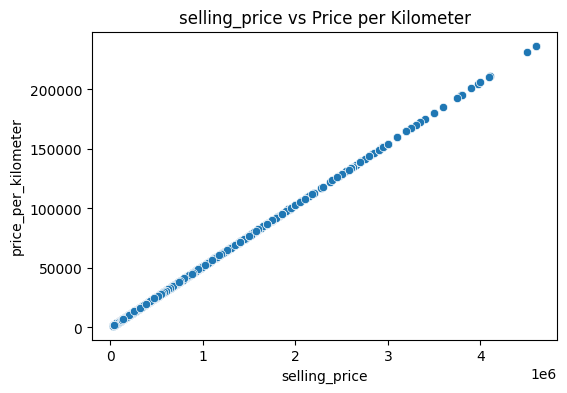

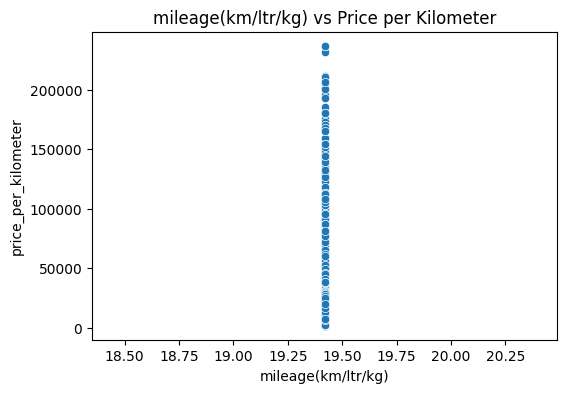

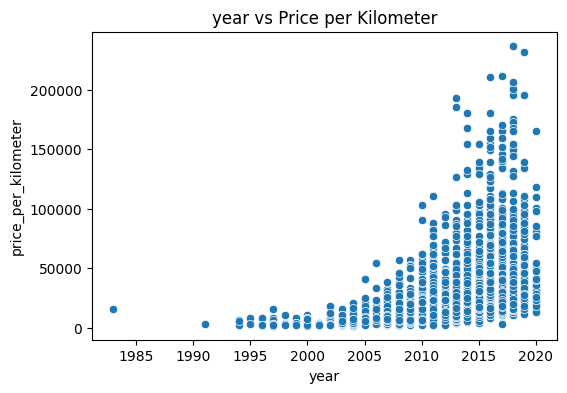

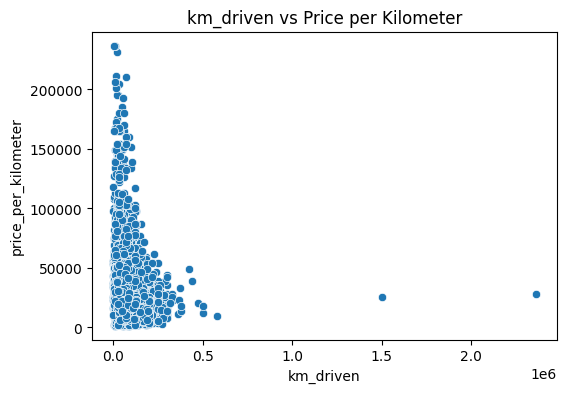

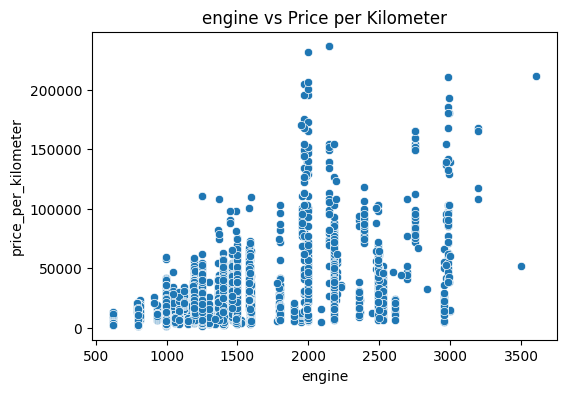

In [101]:
# Lineality
# scatter plot showing linearity between features
# Linearity check with selected columns
selected_cols = ["selling_price", "mileage(km/ltr/kg)", "year", "km_driven", "engine",]

for col in selected_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=col, y="price_per_kilometer")
    plt.title(f"{col} vs Price per Kilometer")
    plt.show()



In [90]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age,price_per_kilometer
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,19.418783,1248.0,74.00,5.0,11,23173.439434
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,19.418783,1498.0,103.52,5.0,11,19053.716868
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,19.418783,1497.0,78.00,5.0,19,8136.452068
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,19.418783,1396.0,90.00,5.0,15,11586.719717
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,19.418783,1298.0,88.20,5.0,18,6694.549170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6901,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,19.418783,998.0,67.10,5.0,12,13389.098340
6902,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,19.418783,1396.0,88.73,5.0,11,24460.852736
6903,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,19.418783,1197.0,82.85,5.0,12,16478.890264
6904,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,19.418783,1493.0,110.00,5.0,18,6952.031830


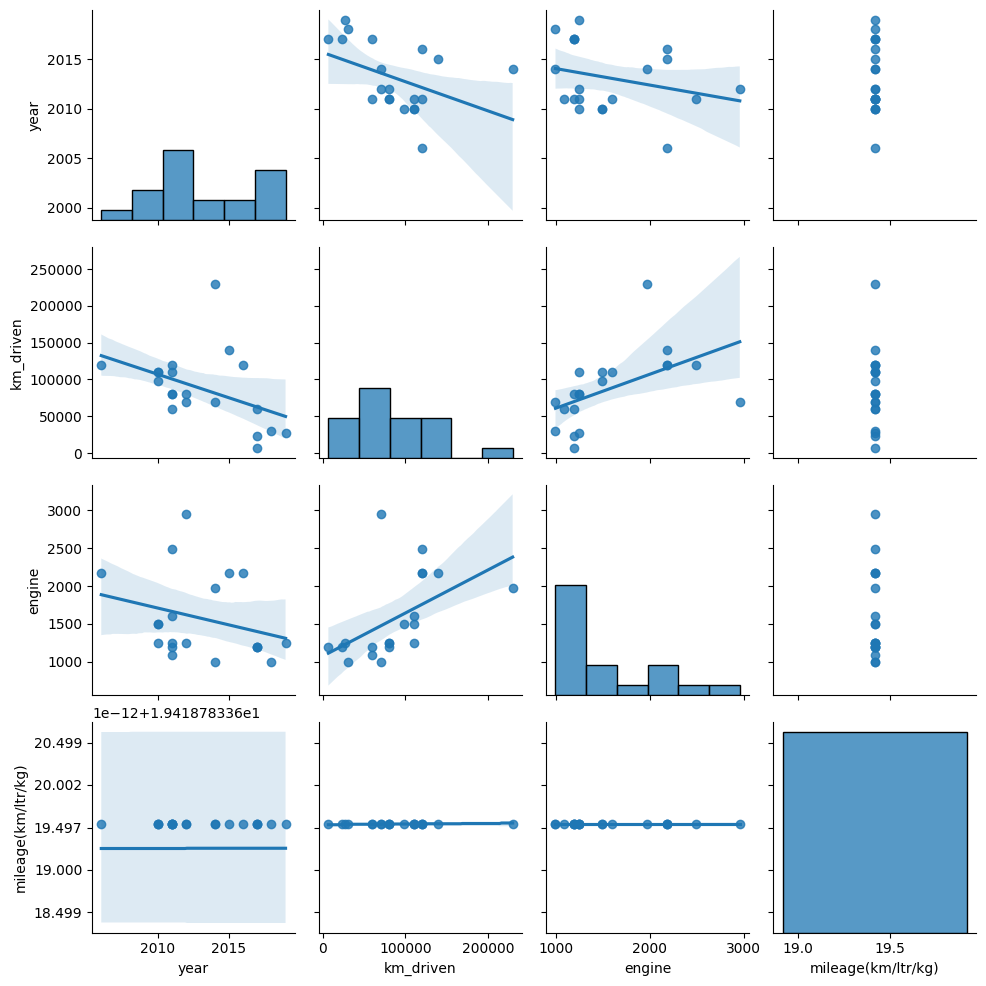

In [ ]:
#Showing  Multivariate normality
sampled_df = df.sample(20, random_state=42)  
sns.pairplot(sampled_df, vars=["year", "km_driven", "engine","mileage(km/ltr/kg)"], kind="reg")
plt.show()


#### LINEAR REGRESSION

#### Train a Linear Regression model to predict the car’s selling price using selected features.
- Split the dataset into train/test sets, train the model, and print the coefficients and intercept.

In [62]:
#importing libraries
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [63]:
# training a Linear Regression model to predict the car’s selling price using selected features.
# Features (x) and Target (y)
x = df.select_dtypes(include=['int64', 'float64']).drop(columns=['selling_price'])
y = df["selling_price"]

In [64]:
# Spliting  dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [65]:
# Training the model
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [66]:

# Predictions
y_pred = lin_model.predict(x_test)

In [67]:
# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Model Performance:")
print("R² Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

Model Performance:
R² Score: 1.0
MAE: 1.5465885012608707e-10
RMSE: 2.3235500937085895e-10


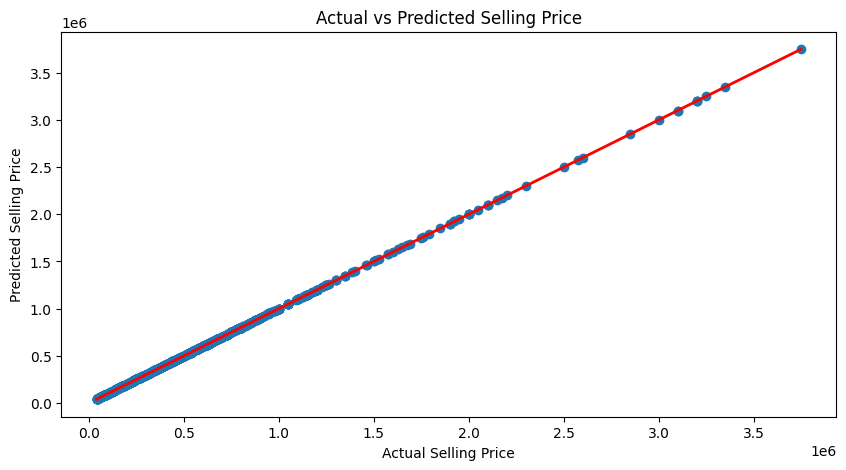

In [68]:
# Scatter plot for Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.show()

#### Lasso 

In [69]:
#Lasso Regression
from sklearn.linear_model import Lasso

In [70]:
    # Lasso Model
lasso = Lasso(alpha=0.1) 
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_test)

In [71]:
print("Lasso Regression MSE:", mean_squared_error(y_test, lasso_pred))
print("Lasso Regression R² Score:", r2_score(y_test, lasso_pred))
print("Lasso Regression MAE:", mean_absolute_error(y_test, lasso_pred))
print("Lasso Regression RMSE:", np.sqrt(mean_squared_error(y_test, lasso_pred)))

Lasso Regression MSE: 0.0005239149942394695
Lasso Regression R² Score: 0.9999999999999971
Lasso Regression MAE: 0.01591799590264817
Lasso Regression RMSE: 0.02288918946226514


#### Ridge Regression

In [72]:
from sklearn.linear_model import Ridge

In [73]:
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
ridge_pred = ridge.predict(x_test)

In [74]:
print("Ridge Regression MSE:", mean_squared_error(y_test, ridge_pred))
print("Ridge Regression R² Score:", r2_score(y_test, ridge_pred))
print("Ridge Regression MAE:", mean_absolute_error(y_test, ridge_pred))
print("Ridge Regression RMSE:", np.sqrt(mean_squared_error(y_test, ridge_pred)))

Ridge Regression MSE: 6.936160682348661e-16
Ridge Regression R² Score: 1.0
Ridge Regression MAE: 1.611479829461752e-08
Ridge Regression RMSE: 2.6336591811296807e-08


In [75]:
# crossvalidation of the ridge regression model
from sklearn.model_selection import cross_val_score,KFold
ridge_cv_scores = cross_val_score(ridge, x, y, cv=5, scoring='neg_mean_squared_error')
ridge_cv_rmse = np.sqrt(-ridge_cv_scores)
print("Ridge Regression CV RMSE:", ridge_cv_rmse.mean())

# cv- splits the data into 5 folds for training and validation
# x and y are the features and target variable respectively
# scoring='neg_mean_squared_error' -wanting to minimize the MSE
# taking the negative because cross_val_score expects a score to maximize

Ridge Regression CV RMSE: 2.727043821705116e-08


In [76]:
# 5-fold CV with negative MSE scoring
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = -cross_val_score(ridge, x_train, y_train,scoring="neg_mean_squared_error",cv=kf)

rmse_scores = np.sqrt(mse_scores)
r2_scores = cross_val_score(ridge, x_train, y_train,scoring="r2", cv=kf)

print("MSE Scores per fold:", mse_scores)
print("Mean MSE:", mse_scores.mean())
print("RMSE Scores per fold:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("R² Scores per fold:", r2_scores)
print("Mean R²:", r2_scores.mean())


MSE Scores per fold: [8.70768057e-16 1.09000784e-15 2.13241588e-15 8.73180810e-16
 9.36681595e-16]
Mean MSE: 1.1806108356161427e-15
RMSE Scores per fold: [2.95087793e-08 3.30152668e-08 4.61780887e-08 2.95496330e-08
 3.06052544e-08]
Mean RMSE: 3.377140443099902e-08
R² Scores per fold: [1. 1. 1. 1. 1.]
Mean R²: 1.0


In [77]:
# the best performing model

# Puting models in a dictionary for easy looping
models = {
    "Linear Regression": lin_model,
    "Lasso Regression": lasso,
    "Ridge Regression": ridge
}

# Dictionary to store results
results = {}

for name, mdl in models.items():
    y_pred = mdl.predict(x_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}

# Convert results to a DataFrame for easier viewing
import pandas as pd
results_df = pd.DataFrame(results).T  # Transpose for readability
print(results_df)

# Select best model (based on lowest RMSE or highest R2)
best_model_name = results_df["RMSE"].idxmin()  # choose lowest RMSE
best_model = models[best_model_name]

print(f"Best performing model: {best_model_name}")



                            MSE          RMSE           MAE   R2
Linear Regression  5.398885e-20  2.323550e-10  1.546589e-10  1.0
Lasso Regression   5.239150e-04  2.288919e-02  1.591800e-02  1.0
Ridge Regression   6.936161e-16  2.633659e-08  1.611480e-08  1.0
Best performing model: Linear Regression


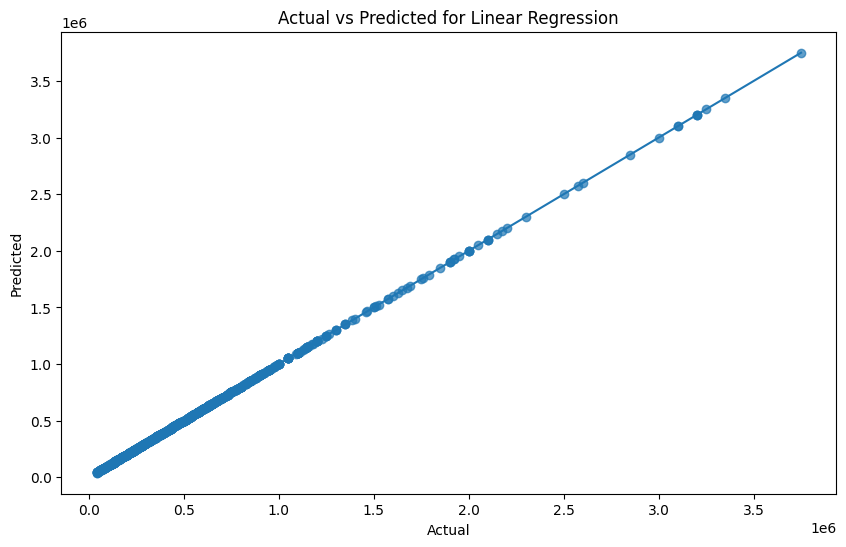

In [78]:
# plotting the actual vs predicted values for the best performing model
import matplotlib.pyplot as plt
y_pred = best_model.predict(x_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Actual vs Predicted for {best_model_name}")
plt.show()


In [79]:
#Using GridSearchCV to find the best alpha value for Ridge Regression.
from sklearn.model_selection import GridSearchCV

In [80]:
# Defining the hyperparameters and their possible values
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
}

# Creating a model
model = Ridge()

# Using grid search to find the optimal hyperparameters
grid_search = GridSearchCV(model, param_grid)
grid_search.fit(x, y)

# Print the optimal values for the hyperparameters
print(grid_search.best_params_)

{'alpha': 0.01}


#### Polygomal regression 

In [81]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age,price_per_kilometer
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,19.418783,1248.0,74.00,5.0,11,23173.439434
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,19.418783,1498.0,103.52,5.0,11,19053.716868
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,19.418783,1497.0,78.00,5.0,19,8136.452068
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,19.418783,1396.0,90.00,5.0,15,11586.719717
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,19.418783,1298.0,88.20,5.0,18,6694.549170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6901,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,19.418783,998.0,67.10,5.0,12,13389.098340
6902,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,19.418783,1396.0,88.73,5.0,11,24460.852736
6903,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,19.418783,1197.0,82.85,5.0,12,16478.890264
6904,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,19.418783,1493.0,110.00,5.0,18,6952.031830


In [82]:
from sklearn.preprocessing import PolynomialFeatures

In [83]:
# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x_train)

In [84]:
# Train polynomial regression model
poly_model = LinearRegression()
poly_model.fit(x_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [87]:
# Predictions
y_pred_poly = poly_model.predict(poly.transform(x_test))

# R² score
print("Polynomial Regression R²:", r2_poly := r2_score(y_test, y_pred_poly))
print("Polynomial Regression MSE:", mean_squared_error(y_test, y_pred_poly))
print("Polynomial Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))

Polynomial Regression R²: 1.0
Polynomial Regression MSE: 1.238792733752246e-18
Polynomial Regression RMSE: 1.1130106620119352e-09
